### Sentiment Analysis using TextBlob
This notebook performs polarity analysis on the content of the tweets. Based on the score obtained, positive, negative or neutral sentiments can be perceived.
The content of the tweets was preprocessed (removal of scraped hashtags, symbols, emojis, special characters and Stopwords)

In [16]:
from textblob import TextBlob
import pandas as pd
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_sentiment = pd.read_csv("../../../data/interim/_Post_Twitter_all_Hashtags_with_matches_clean_removed_stopwords_no_lem.csv")

C:\Users\Study\AppData\Local\Temp\ipykernel_9008\4104027784.py:1: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"..\..\..\data\interim\_Post_Twitter_all_Hashtags_with_matches_clean_removed_stopwords_no_lem.csv")


In [18]:
df_sentiment.head()

,User,Date_Created,Number of Likes,Tweet,Retweets,Language,Mentioned Users,Source of Tweet,Haschtag,Month,...,match_time,match_score,match_#lLocation,match_attendance,Match,match_time_orig,match_location_orig,match_adj_start_time,match_adj_end_time,Tweet_clean
0,mufcMPB,2022-10-21 23:58:23+00:00,6726,Erik ten Hag wants Cristiano Ronaldo to say so...,370,en,"[User(username='FabrizioRomano', id=330262748,...",Twitter for iPhone,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erik ten Hag wants Cristiano Ronaldo say sorry...
1,KhashanDalia,2022-10-21 23:56:31+00:00,8,Fair enough tbh. Those players look up to him ...,1,en,NaN,Twitter for Android,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fair enough honest players look moon playing c...
2,RedReveal,2022-10-21 23:54:21+00:00,6,Happy Birthday Jade Moore! #mufc https://t.co/...,1,en,NaN,Twitter for Android,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happy Birthday Jade Moore httpstcoKMSPUNGdDb
3,manutdnewsonly,2022-10-21 23:47:00+00:00,3,Starting XI: Chelsea vs Manchester United #MUF...,0,en,NaN,SocialBee.io v2,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Starting XI Chelsea vs Manchester MUFCFamily R...
4,colbeck_daniel,2022-10-21 23:42:07+00:00,1,Erik Ten Hag is definitely the best signing of...,1,en,NaN,Twitter for Android,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erik Ten Hag definitely best signing summer he...


In [19]:
df_sentiment["Tweet_clean"] = df_sentiment["Tweet_clean"].astype(str)

In [20]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df_sentiment['Polarity'] = df_sentiment['Tweet_clean'].apply(getPolarity)
df_sentiment.head()

,User,Date_Created,Number of Likes,Tweet,Retweets,Language,Mentioned Users,Source of Tweet,Haschtag,Month,...,match_score,match_#lLocation,match_attendance,Match,match_time_orig,match_location_orig,match_adj_start_time,match_adj_end_time,Tweet_clean,Polarity
0,mufcMPB,2022-10-21 23:58:23+00:00,6726,Erik ten Hag wants Cristiano Ronaldo to say so...,370,en,"[User(username='FabrizioRomano', id=330262748,...",Twitter for iPhone,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erik ten Hag wants Cristiano Ronaldo say sorry...,-0.025000
1,KhashanDalia,2022-10-21 23:56:31+00:00,8,Fair enough tbh. Those players look up to him ...,1,en,NaN,Twitter for Android,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fair enough honest players look moon playing c...,0.360714
2,RedReveal,2022-10-21 23:54:21+00:00,6,Happy Birthday Jade Moore! #mufc https://t.co/...,1,en,NaN,Twitter for Android,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happy Birthday Jade Moore httpstcoKMSPUNGdDb,0.800000
3,manutdnewsonly,2022-10-21 23:47:00+00:00,3,Starting XI: Chelsea vs Manchester United #MUF...,0,en,NaN,SocialBee.io v2,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Starting XI Chelsea vs Manchester MUFCFamily R...,0.000000
4,colbeck_daniel,2022-10-21 23:42:07+00:00,1,Erik Ten Hag is definitely the best signing of...,1,en,NaN,Twitter for Android,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erik Ten Hag definitely best signing summer he...,0.465000


In [22]:
data=df_sentiment[['Tweet_clean','Polarity']]

data

,Tweet_clean,Polarity
0,Erik ten Hag wants Cristiano Ronaldo say sorry...,-0.025000
1,Fair enough honest players look moon playing c...,0.360714
2,Happy Birthday Jade Moore httpstcoKMSPUNGdDb,0.800000
3,Starting XI Chelsea vs Manchester MUFCFamily R...,0.000000
4,Erik Ten Hag definitely best signing summer he...,0.465000
...,...,...
1075169,UtdXclusive Never thousand yearsManUnited,0.000000
1075170,AdvoBarryRoux Chiefs RealMadrid even life love...,0.700000
1075171,Hope mass walk rd minute tomorrow RR read crow...,-0.250000
1075172,Going bed ANGRY supporter th April premierleag...,0.000000


In [28]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_sentiment['Sentiment'] = df_sentiment['Polarity'].apply(getAnalysis )
df_sentiment.to_csv("../../../data/processed/_Post_Twitter_all_Hashtags_with_matches_clean_removed_stopwords_no_lem_sentiment_and_polarity.csv")
df_sentiment.head()


,User,Date_Created,Number of Likes,Tweet,Retweets,Language,Mentioned Users,Source of Tweet,Haschtag,Month,...,match_#lLocation,match_attendance,Match,match_time_orig,match_location_orig,match_adj_start_time,match_adj_end_time,Tweet_clean,Polarity,Sentiment
0,mufcMPB,2022-10-21 23:58:23+00:00,6726,Erik ten Hag wants Cristiano Ronaldo to say so...,370,en,"[User(username='FabrizioRomano', id=330262748,...",Twitter for iPhone,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erik ten Hag wants Cristiano Ronaldo say sorry...,-0.025000,Negative
1,KhashanDalia,2022-10-21 23:56:31+00:00,8,Fair enough tbh. Those players look up to him ...,1,en,NaN,Twitter for Android,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fair enough honest players look moon playing c...,0.360714,Positive
2,RedReveal,2022-10-21 23:54:21+00:00,6,Happy Birthday Jade Moore! #mufc https://t.co/...,1,en,NaN,Twitter for Android,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happy Birthday Jade Moore httpstcoKMSPUNGdDb,0.800000,Positive
3,manutdnewsonly,2022-10-21 23:47:00+00:00,3,Starting XI: Chelsea vs Manchester United #MUF...,0,en,NaN,SocialBee.io v2,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Starting XI Chelsea vs Manchester MUFCFamily R...,0.000000,Neutral
4,colbeck_daniel,2022-10-21 23:42:07+00:00,1,Erik Ten Hag is definitely the best signing of...,1,en,NaN,Twitter for Android,MUFC,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erik Ten Hag definitely best signing summer he...,0.465000,Positive


In [25]:
# Wordcloud with positive tweets
positive_tweets = data['Tweet_clean'][data["Sentiment"] == 'Positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: name 'STOPWORDS' is not defined

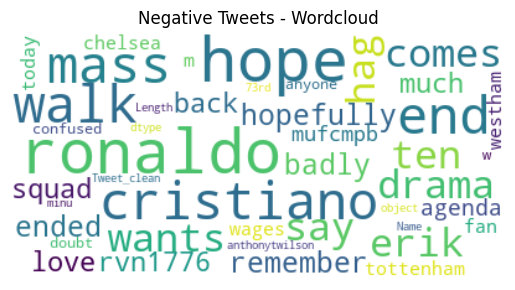

In [18]:
# Wordcloud with negative tweets
negative_tweets = data['Tweet_clean'][data["Sentiment"] == 'Negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

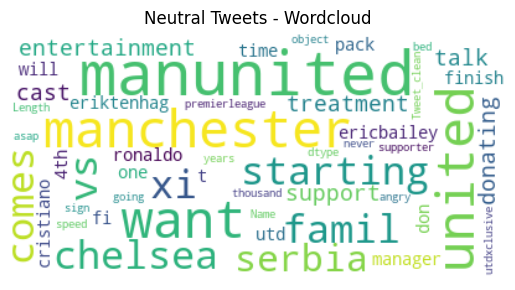

In [26]:
# Wordcloud with neutral tweets
neutral_tweets = data['Tweet_clean'][data["Sentiment"] == 'Neutral']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
neutral_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(neutral_tweets))
plt.figure()
plt.title("Neutral Tweets - Wordcloud")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
temp = df_sentiment.groupby("Sentiment").count()["Tweet_clean"].reset_index().sort_values(by="Tweet_clean", ascending=False)
temp.style.background_gradient(cmap="Purples")

,Sentiment,Tweet_clean
2,Positive,475816
1,Neutral,414491
0,Negative,184867


In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x="Sentiment", data=df, palette="viridis")
ax.bar_label(ax.containers[0])